<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_15_Muklis_Pramaditya_Ardian_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah data penjualan setelah terjadinya pandemi Covid-19 dengan kategori produk sports & apparel. Dikarenakan saat ini penjualan banyak dilakukan secara online, anda berencana untuk memperbaiki tampilan website dengan cara mengelompokkan produk berdasarkan kategori-kategori tertentu. Perombakan ini diharapkan dapat mempermudah pembeli dalam memilih barang sesuai dengan selera dan kebutuhan mereka. Untuk mencapai tujuan tersebut anda akan menggunakan history penjualan sebelumnya. Data yang anda miliki adalah sebagai berikut :

- Product Name : Nama produk 
- Product ID : Id unik produk
- Listing Price : Harga sebenarnya dari produk
- Sale Price : Harga saat produk dibeli
- Discount : Diskon yang diberikan dalam suatu produk
- Brand : Nama Brand dari produk
- Description : Deskripsi produk
- Rating : Rating yang diberikan user
- Reviews : Jumlah review suatu produk
- Last Visited : Record terakhir produk dikunjungi oleh customer

Selain mengelompokkan produk, anda juga ingin menganalisis persaingan yang terjadi pada tiap-tiap brand. Dengan mengetahui minat pembeli, harapannya untuk kedepannya anda dapat menyesuaikan store anda dengan kebutuhan pasar.

## Import Libraries and Data

In [1]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membuat path untuk mengidentifikasi letak directory
path = '/content/gdrive/MyDrive/SIB/6. Supervised Machine Learning - Clustering/6.1 Clustering - K - Means/'

# Cek directory
os.listdir(path)

['customer_segments.csv',
 'Clustering_product.csv',
 '[REV] Meet 15 - Clustering K-means.ipynb',
 'Meet 15. Clustering BreakoutRoom.ipynb',
 'Exercise_15_Muklis_Pramaditya Ardian Saputra.ipynb']

In [4]:
# Load data
df = pd.read_csv(os.path.join(path, "Clustering_product.csv"))
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t


In [5]:
# Data kategori
categorical = ["Brand"]
df_categorical = df[categorical]
df_categorical.head()

,Brand
0,Adidas ORIGINALS
1,Adidas ORIGINALS
2,Adidas CORE / NEO
3,Adidas CORE / NEO
4,Adidas ORIGINALS


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

In [6]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited	  3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [7]:
# Analisa deskriptif
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [8]:
df = df.rename(columns={'Listing Price': 'Listing_Price'})
df = df.rename(columns={'Sale Price': 'Sale_Price'})

In [9]:
# Analisa deskriptif
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


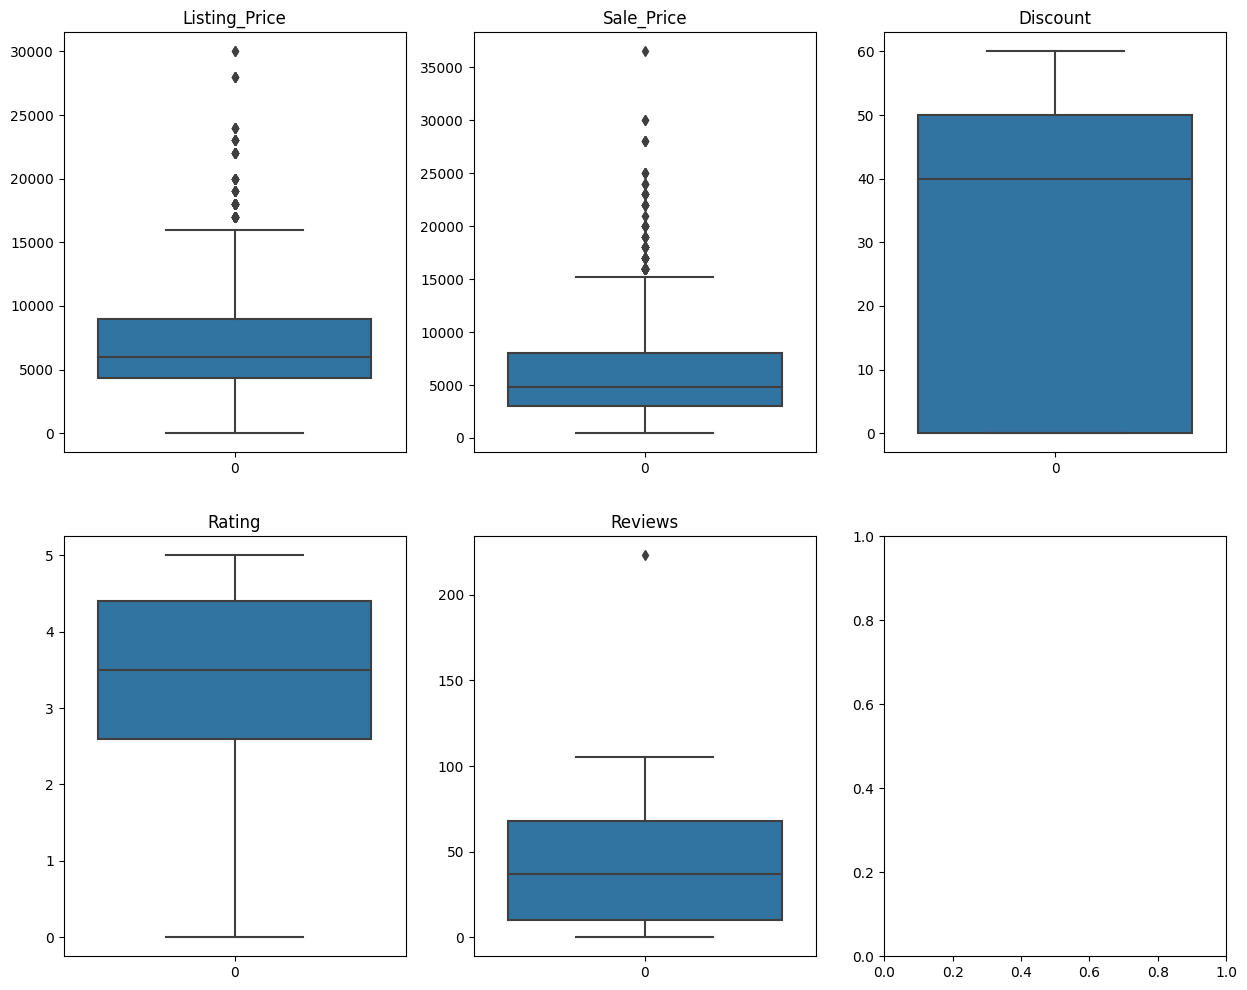

In [10]:
# Persebaran
fig, ax = plt.subplots(2,3, figsize=(15,12))
sns.boxplot(df["Listing_Price"],ax=ax[0,0])
ax[0, 0].title.set_text('Listing_Price')
sns.boxplot(df["Sale_Price"], ax=ax[0,1])
ax[0, 1].title.set_text('Sale_Price')
sns.boxplot(df["Discount"], ax=ax[0,2])
ax[0, 2].title.set_text('Discount')
sns.boxplot(df["Rating"], ax=ax[1,0])
ax[1, 0].title.set_text('Rating')
sns.boxplot(df["Reviews"], ax=ax[1,1])
ax[1, 1].title.set_text('Reviews')

plt.show()

Dari detect outlier menggunakan bloxplot diatas didapat
1. Terdapat outliers pada data Listing Price, Sale Price, Reviews
2. Tidak terdapat outliers pada data Discount dan Rating

1. Handling Outliers pada Listing Price

Text(0.5, 0, 'Listing Price')

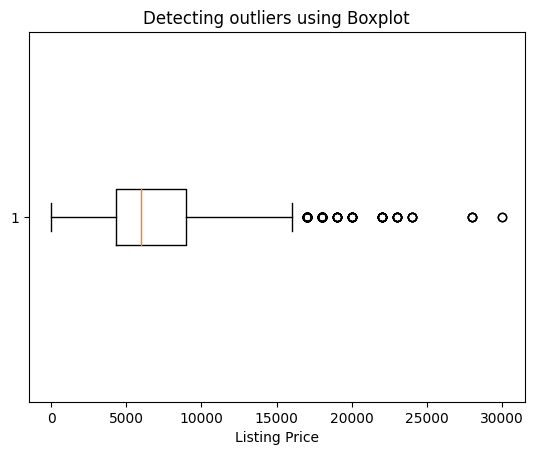

In [11]:
# Deteksi dengan boxplot
plt.boxplot(list(df.Listing_Price), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Listing Price')

In [12]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df.Listing_Price)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 17995, 17995, 17995, 17995, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 18995, 18995, 18999, 18999, 18999, 18999, 18999, 18999, 18999, 19995, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 22999, 22999, 22999, 22999, 22999, 22999, 22999, 22999, 23999, 23999, 23999, 23999, 23999, 27999, 27999, 27999, 27999, 29999, 29999]


In [13]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df.Listing_Price))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 17995, 17995, 17995, 17995, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 18995, 18995, 18999, 18999, 18999, 18999, 18999, 18999, 18999, 19995, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 21999, 22999, 22999, 22999, 22999, 22999, 22999, 22999, 22999, 23999, 23999, 23999, 23999, 23999, 27999, 27999, 27999, 27999, 29999, 29999]
Banyaknya outlier:  132


Replace dengan median data

In [14]:
e = []
for y in list(df.Listing_Price):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df.Listing_Price))
    else:
        y=y
    e.append(y)

In [15]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Listing_Price)))
print("Median data : ",statistics.median(list(df.Listing_Price)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  6868.020195838433
Median data :  5999.0
Mean data setelah replacing median :  6331.63341493268
Median data setelah replacing median:  5999.0


Text(0.5, 0, 'Listing Price')

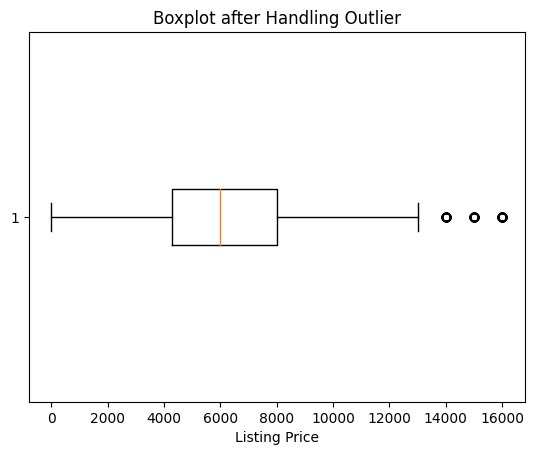

In [16]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Listing Price')

2. Handling Outliers pada Sale Price

Text(0.5, 0, 'Sale Price')

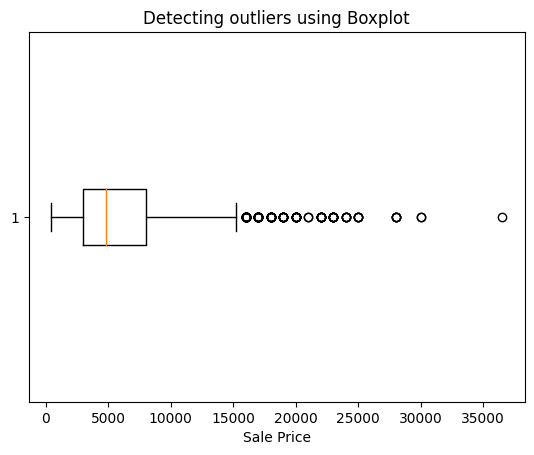

In [17]:
# Deteksi dengan boxplot
plt.boxplot(list(df.Sale_Price), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sale Price')

In [18]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df.Sale_Price)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15997, 15999, 15999, 15999, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 17995, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 18995, 18995, 18995, 18995, 18995, 18995, 18995, 18995, 18999, 18999, 19995, 19995, 19995, 19995, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 20995, 20995, 21995, 21995, 21995, 21995, 21995, 21999, 21999, 21999, 21999, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22999, 23999, 23999, 23999, 23999, 23999, 24995, 24995, 24995, 24995, 27999, 27999, 27999, 27999, 29999,

In [19]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df.Sale_Price))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15995, 15997, 15999, 15999, 15999, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16995, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 16999, 17995, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 17999, 18995, 18995, 18995, 18995, 18995, 18995, 18995, 18995, 18999, 18999, 19995, 19995, 19995, 19995, 19999, 19999, 19999, 19999, 19999, 19999, 19999, 20995, 20995, 21995, 21995, 21995, 21995, 21995, 21999, 21999, 21999, 21999, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22999, 23999, 23999, 23999, 23999, 23999, 24995, 24995, 24995, 24995, 27999, 27999, 27999, 27999, 

Replace dengan median data

In [20]:
e = []
for y in list(df.Sale_Price):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df.Sale_Price))
    else:
        y=y
    e.append(y)

In [21]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Sale_Price)))
print("Median data : ",statistics.median(list(df.Sale_Price)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  6134.265605875153
Median data :  4799.0
Mean data setelah replacing median :  5517.263463892289
Median data setelah replacing median:  4799.0


Text(0.5, 0, 'Sale Price')

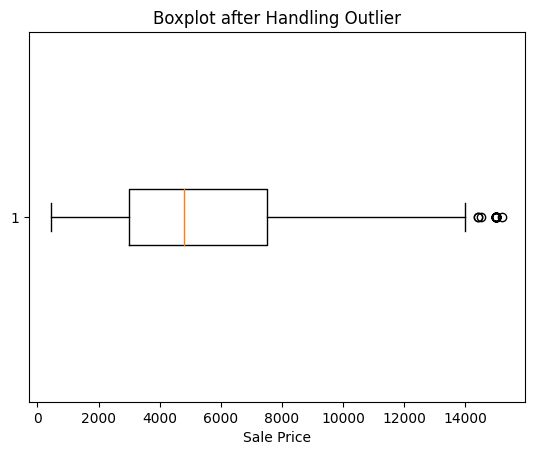

In [22]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Sale Price')

3. Handling Outliers pada Reviews

Text(0.5, 0, 'Reviews')

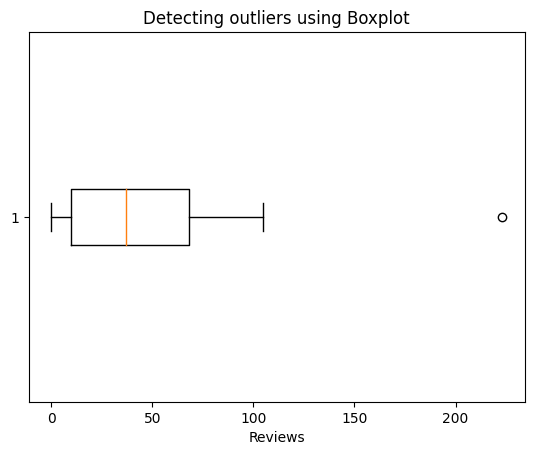

In [23]:
# Deteksi dengan boxplot
plt.boxplot(list(df.Reviews), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Reviews')

In [24]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df.Reviews)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [223]


In [25]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df.Reviews))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [223]
Banyaknya outlier:  1


hapus outliers

In [26]:
# Deleting
tr = []
for j in list(df.Reviews):
    f = j in outliers
    if f is False:
        tr.append(j)

In [27]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df.Reviews)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  3268
Banyaknya data setelah diatasi outlier:  3267


Text(0.5, 0, 'Reviews')

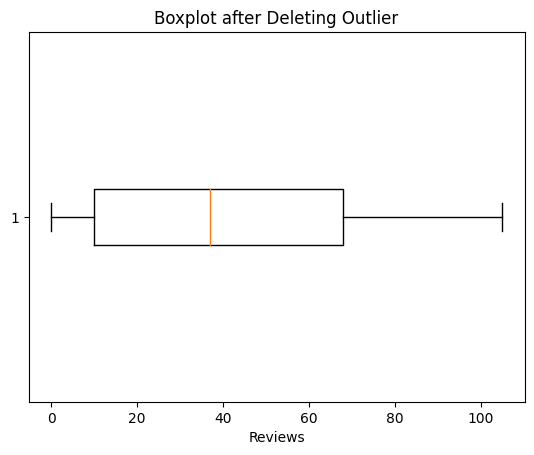

In [28]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Reviews')

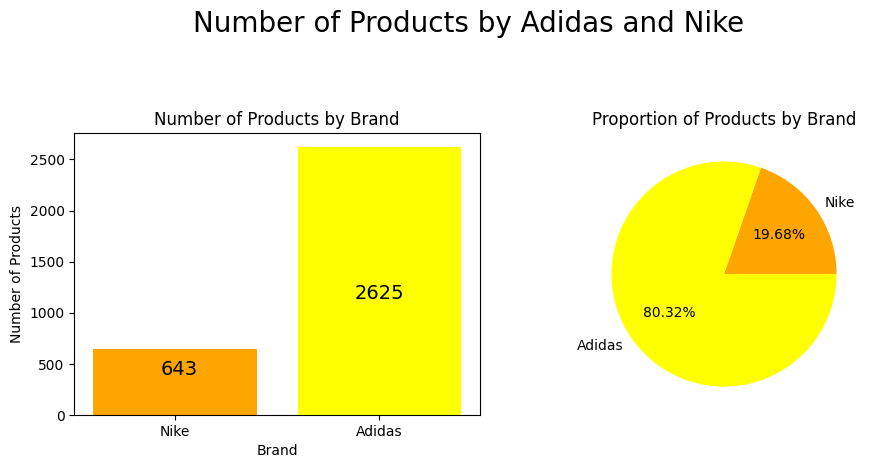

In [29]:
# Nike products count
nike_products = [p for p in df['Brand'] if "nike" in p.lower()]
num_nike = len(nike_products)

# Adidas products count
adidas_products = [p for p in df['Brand'] if "adidas" in p.lower()]
num_adidas = len(adidas_products)

# Customise plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Number of Products by Adidas and Nike",fontsize=20)
y = [num_nike, num_adidas]
colors=['Orange','Yellow']

# Bar chart
ax1.bar(x=['Nike','Adidas'], height=y, color=colors)
ax1.set_title("Number of Products by Brand")
ax1.set_xlabel("Brand")
ax1.text(x=-0.07, y=390,s=num_nike, fontsize=14)
ax1.text(x=0.88, y=1140,s=num_adidas, fontsize=14)
ax1.set_ylabel("Number of Products")

# Pie Chart
ax2.set_title("Proportion of Products by Brand")
ax2.pie(labels=['Nike','Adidas'], x=y, autopct='%.2f%%', colors=colors )
fig.tight_layout(pad=3.0)

terlihat bahwa distribusi produk milik Adidas jauh lebih tinggi. Salah satu alasannya adalah Adidas memiliki sebagian besar sub-merek atau kolaborasi sementara Nike berada di bawah satu merek.

<Axes: title={'center': 'Products in Adidas Sub-brands'}, xlabel='count', ylabel='Brand'>

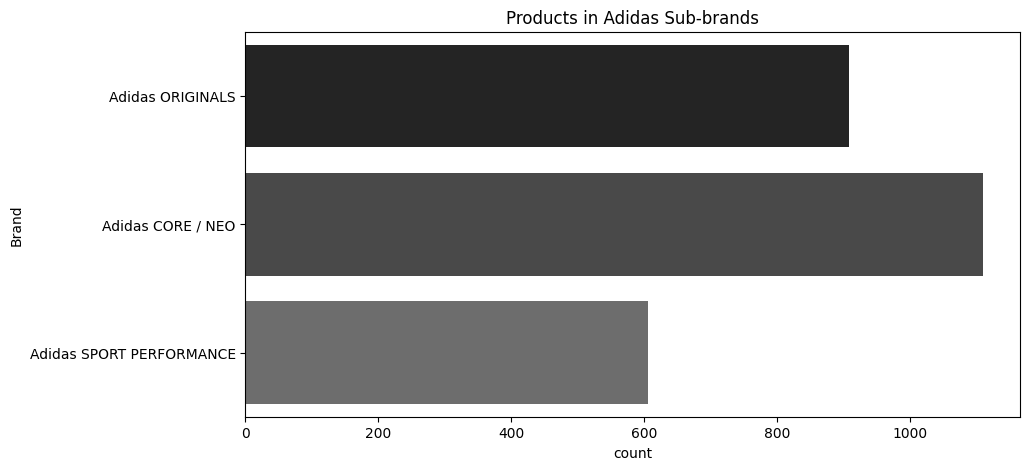

In [30]:
# Only include adidas brands
adidas_brand = df.drop(df[df['Brand'] == "Nike"].index)
nike_brand = df[df['Brand'] == "Nike"]


# Plot bar
plt.figure(figsize=(10,5))
plt.title("Products in Adidas Sub-brands")
plt.ylabel("Adidas Brand")
sns.set_palette("gray")
sns.countplot(data=adidas_brand, y="Brand")

terlihat bahwa produk Adidas CORE/NEO jauh lebih tinggi.

## Data Preprocessing

Dari info data diatas, sudah terlihat bahwa tidak terdapat missing value pada data, sehingga lanngsung ke tahap encode categorical.

### Encode Categorical

In [31]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
cluster_data = pd.concat([encoded_data, df[["Listing_Price", "Sale_Price","Discount","Reviews"]]], axis=1)

cluster_data.head()

,Brand,Listing_Price,Sale_Price,Discount,Reviews
0,1,14999,7499,50,41
1,1,7599,3799,50,24
2,0,999,599,40,37
3,0,6999,3499,50,35
4,1,7999,3999,50,72


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

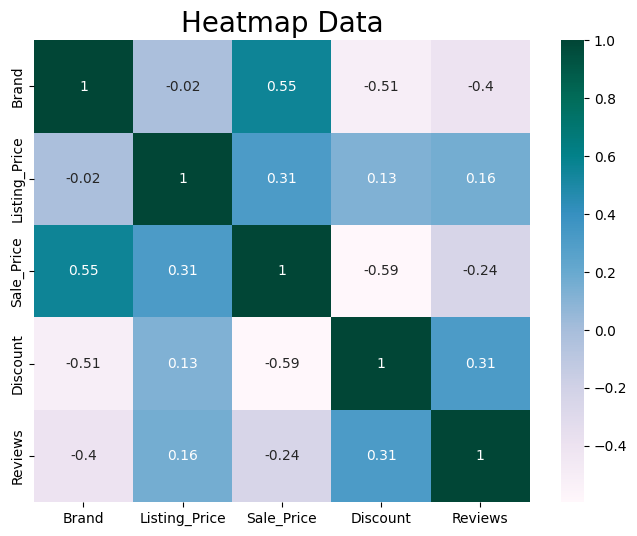

In [32]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'PuBuGn', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari hasil heatmap diatas diketahui bahwa korelasi terbesar dimiliki oleh variabel Sale Price dan juga Brand, selanjutnya disusul oleh Listing Price dan Sale Price, serta Diskon dan Reviews, akan tetapi nilainya cukup rendah. Oleh karena itu, untuk selanjutnya akan digunakan 2 variabel dalam menentukan cluster dari data Sale Price, dan Brand.

In [33]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Listing_Price", 
                                  "Discount","Reviews"], axis = 1)
cluster_data.head()

,Brand,Sale_Price
0,1,7499
1,1,3799
2,0,599
3,0,3499
4,1,3999


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [34]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Brand", "Sale_Price"]] = scaler.fit_transform(cluster_data[["Brand", "Sale_Price"]])
cluster_data.head()

,Brand,Sale_Price
0,-0.213301,0.317928
1,-0.213301,-0.544022
2,-1.105835,-1.289493
3,-1.105835,-0.613910
4,-0.213301,-0.497431


## KMeans Cluster

In [35]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [36]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="segment")

In [37]:
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
pd.concat([df, segment], axis=1)

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,1
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,1
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,1
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,1
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,1
...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01\t,0
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03\t,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07\t,0
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19\t,0


### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [38]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

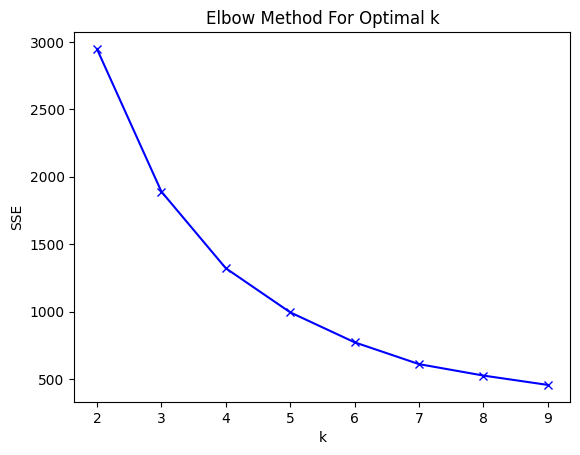

In [39]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3 atau k=4, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 4 dikarenakan jarak antara 2 dan 3 terlalu jauh. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [40]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.52311466263303
For n_clusters = 3, silhouette score is 0.5069809199346808


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.5078796959670545
For n_clusters = 5, silhouette score is 0.5495994963565253


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.5487480914250895
For n_clusters = 7, silhouette score is 0.5682598922220364


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5908260535614022
For n_clusters = 9, silhouette score is 0.6030330201143289


Dari silhouette model didapat k-kluster yang optimum adalah 9, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=9 yang artinya customer akan dibagi kedalam 9 kelompok.

In [41]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=9)
cluster.fit(cluster_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [42]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [43]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([df, segment], axis=1)
results.head()

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,1
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,5
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,2
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,2
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,5


In [44]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
1570,Unisex Football Predator Mutator 20.1 Firm Gro...,EF1629,14999,14999,0,Adidas SPORT PERFORMANCE,You're not cheating the system. You're just be...,2.8,60,2020-04-13T15:07:17\t,0
1597,Women's adidas by Stella Mccartney Running Ult...,EG1073,17999,17999,0,Adidas SPORT PERFORMANCE,Turn it up a notch. The dream of a running san...,3.8,76,2020-04-13T15:07:18\t,0
1601,Women's adidas by Stella Mccartney Running Ult...,EG1069,17999,17999,0,Adidas SPORT PERFORMANCE,adidas and Stella McCartney have been fusing t...,3.3,24,2020-04-13T15:07:19\t,0
1604,Women's Running Boston Shoes,EF2212,17999,17999,0,Adidas SPORT PERFORMANCE,Find your edge. Then push past it. Meeting the...,5.0,47,2020-04-13T15:07:19\t,0
1605,Women's adidas by Stella Mccartney Running Ult...,EG1071,17999,17999,0,Adidas SPORT PERFORMANCE,"Energy assured, from dusk until dawn. These sh...",3.5,89,2020-04-13T15:07:19\t,0


In [45]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t,1
52,Women's adidas Originals Marathon Tech Shoes,EE4954,11999,7199,40,Adidas ORIGINALS,"These shoes draft off the Marathon TR, a trail...",4.4,35,2020-04-13T15:06:19\t,1
74,Men's adidas Originals Superstar Shoes,EG4957,7999,7999,0,Adidas ORIGINALS,These trainers born in the '70s keep the look ...,4.9,38,2020-04-13T15:06:20\t,1
85,Men's adidas Originals FuturePacer Shoes,CM8453,19999,9999,50,Adidas ORIGINALS,The Futurepacer reworks the revolutionary desi...,3.5,1,2020-04-13T15:06:21\t,1
86,MEN'S ADIDAS ORIGINALS MICROPACER X R1 SHOES,EE3625,15999,7999,50,Adidas ORIGINALS,These shoes are a hybrid of retro and modern a...,0.0,94,2020-04-13T15:06:21\t,1


In [46]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t,2
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t,2
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15\t,2
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15\t,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15\t,2


In [47]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
72,Men's adidas Outdoor Elevate Sandals,CK9830,2799,1399,50,Adidas SPORT PERFORMANCE,Stylish and sleek adidas sandals for women are...,2.8,14,2020-04-13T15:06:20\t,3
84,Men's adidas Running Edge PR Shoes,AC8122,7999,3999,50,Adidas SPORT PERFORMANCE,"With a springy midsole and breathable upper, t...",4.2,66,2020-04-13T15:06:21\t,3
87,Men's adidas Outdoor Andorian Shoes,CM0031,4599,2299,50,Adidas SPORT PERFORMANCE,The adidas Andorian shoes for men are crafted ...,0.0,49,2020-04-13T15:06:21\t,3
93,Men's adidas Running PureBounce+ Clima Shoes,BC0836,8999,4499,50,Adidas SPORT PERFORMANCE,These running shoes are designed with 360 degr...,3.4,90,2020-04-13T15:06:22\t,3
102,Men's adidas Outdoor Terra Light Sandals,CL9928,3599,2159,40,Adidas SPORT PERFORMANCE,Step out in these adidas Terra Light sandals f...,2.4,41,2020-04-13T15:06:22\t,3


In [48]:
# Menampilkan 5 data teratas dari cluster 4
results[results["segment"]==4][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,2020-04-13T15:27:56\t,4
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,2020-04-13T15:27:57\t,4
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,2020-04-13T15:27:57\t,4
2630,Nike Free Metcon 3,CJ6314-146,0,9995,0,Nike,The Nike Free Metcon 3 combines the flexibilit...,0.0,0,2020-04-13T15:27:58\t,4
2632,Nike Free Metcon 3,CJ0861-017,0,9995,0,Nike,The Nike Free Metcon 3 combines Nike Free flex...,5.0,1,2020-04-13T15:27:59\t,4


In [49]:
# Menampilkan 5 data teratas dari cluster 5
results[results["segment"]==5][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t,5
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t,5
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15\t,5
10,Women's adidas Originals Swift Run Shoes,EE4553,7599,4559,40,Adidas ORIGINALS,The Swift distills decades of adidas heritage ...,2.7,36,2020-04-13T15:06:16\t,5
11,Women's adidas Originals Continental Vulc Shoes,EF9315,6599,3959,40,Adidas ORIGINALS,These low-profile shoes come in a pastel color...,4.2,35,2020-04-13T15:06:16\t,5


In [50]:
# Menampilkan 5 data teratas dari cluster 6
results[results["segment"]==6][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,2.4,86,2020-04-13T15:07:07\t,6
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,0.0,7,2020-04-13T15:07:07\t,6
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999,0,Adidas ORIGINALS,Live for the unpredictable. London-born design...,3.1,37,2020-04-13T15:07:08\t,6
1377,UNISEX adidas Originals Pharrell Williams Hu N...,EF2335,21999,21999,0,Adidas ORIGINALS,Pairing vibrant colours with words that honour...,2.7,75,2020-04-13T15:07:09\t,6
1382,UNISEX adidas Originals Pharrell Williams Hu N...,EG7737,21999,21999,0,Adidas ORIGINALS,Pairing vibrant colours with words that honour...,3.0,9,2020-04-13T15:07:09\t,6


In [51]:
# Menampilkan 5 data teratas dari cluster 7
results[results["segment"]==7][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
292,Unisex adidas Originals By Alexander Wang Wang...,EF2438,17999,10799,40,Adidas ORIGINALS,Sweat it out with Alexander Wang. The designer...,3.7,15,2020-04-13T15:06:29\t,7
502,Women's adidas Originals Superstar Shoes,FW6635,10999,10999,0,Adidas ORIGINALS,The future is female. Designers Ji Won Choi an...,3.2,34,2020-04-13T15:06:36\t,7
505,Women's adidas Originals ZX Torsion Shoes,EF4375,11999,11999,0,Adidas ORIGINALS,Refuse to blend in. The '80s style of ZX colli...,2.5,17,2020-04-13T15:06:36\t,7
531,Women's adidas Originals ZX Torsion Shoes,EF4374,11999,11999,0,Adidas ORIGINALS,ZX has always stood for innovation. These wome...,4.2,93,2020-04-13T15:06:37\t,7
598,Women's adidas Originals Supercourt RX Shoes,FV3671,13999,13999,0,Adidas ORIGINALS,The Supercourt RX serves up court style with a...,4.9,87,2020-04-13T15:06:39\t,7


In [52]:
# Menampilkan 5 data teratas dari cluster 8
results[results["segment"]==8][:5]

,Product Name,Product ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,2020-04-13T15:27:56\t,8
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,2020-04-13T15:27:56\t,8
2631,NikeCourt Blanc,CI0808-100,0,5995,0,Nike,"Inspired by heritage models, the NikeCourt Bla...",0.0,0,2020-04-13T15:27:58\t,8
2636,Nike Air Force 1 '07,315115-112,0,7495,0,Nike,The radiance lives on in the Nike Air Force 1 ...,4.5,67,2020-04-13T15:28:00\t,8
2638,Nike SuperRep Go,CJ0860-668,0,7995,0,Nike,The Nike SuperRep Go combines comfortable foam...,0.0,0,2020-04-13T15:28:00\t,8


## EDA


<Axes: xlabel='segment', ylabel='Sale_Price'>

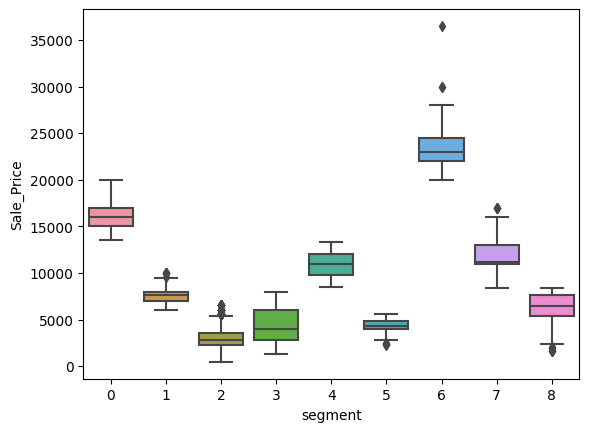

In [53]:
# Pengelompokan customer berdasarkan brand
sns.boxplot(x=results["segment"], y=results["Sale_Price"], data=results)

Dari Sale Price diketahui bahwa
- cluster 0 memiliki range sale price < 10000  
- cluster 1 memiliki range sale price <= 10000 artinya cukup murah
- cluster 2 memiliki range sale price < 10000 artinya cukup murah
- cluster 3 memiliki range sale price > 10000 dan < 20000 yang artinya cukup mahal
- cluster 4 memiliki range sale price > 15000 hingga 35000 yang artinya sangat mahal
- cluster 5 memiliki range sale price <=5000 yang artinya sale sangat murah 
- cluster 6 memiliki range sale price > 5000 dan < 15000 
- cluster 7 memiliki range sale price > 5000 dan < 15000
- cluster 8 memiliki range sale price >= 10000 hingga< 20000 yang artinya cukup mahal
 
**Lalu bagaimana dengan persebaran Brand pada tiap cluster?**

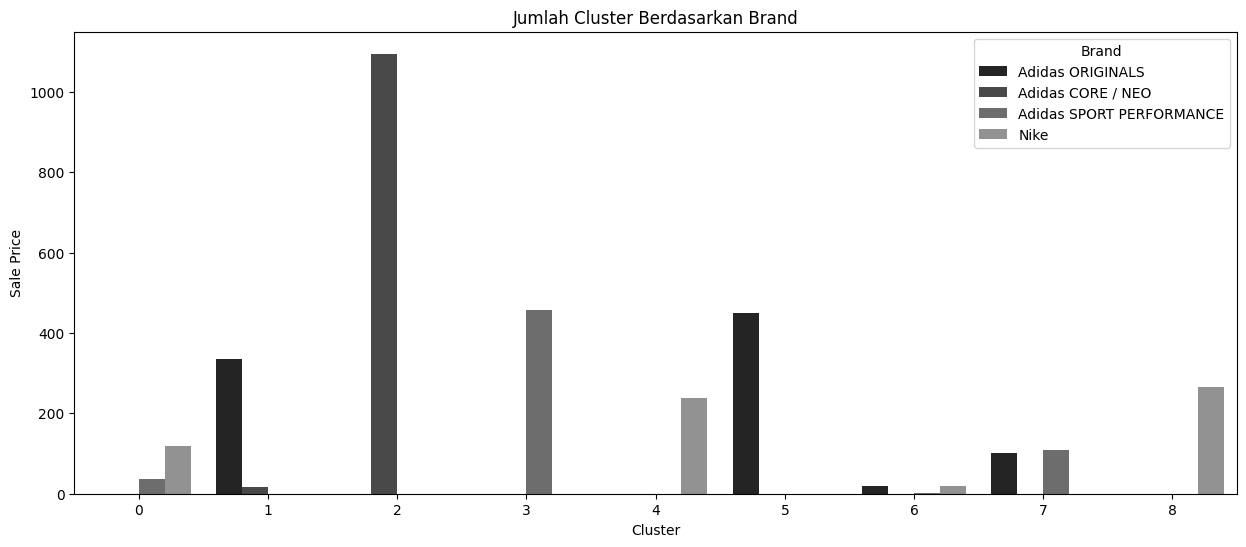

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Brand")
plt.title("Jumlah Cluster Berdasarkan Brand")
plt.xlabel("Cluster")
plt.ylabel("Sale Price")
plt.show()

Ada perbedaan yang cukup mencolok apabila dilihat dari pengaruh Brand. Dari visualisasi diatas diketahui bahwa :
Dari Sale Price diketahui bahwa
- cluster 0: brand yang mendominasi dalam culster ini hanya Adidas CORE/NEO.
- cluster 1: brand yang tercatat dalam culster ini hanya Nike.
- cluster 2: brand yang tercatat dalam culster ini hanya Adidas Original.
- cluster 3: brand yang tercatat dalam culster ini adalah Adidas Original dan Adidas Sport/Performance. 
- cluster 4: brand yang tercatat dalam culster ini adalah Adidas Original, Adidas Sport/Performance, dan Nike.
- cluster 5: brand yang tercatat dalam culster ini adalah Adidas Sport/Performance, dan Nike.
- cluster 6: brand yang tercatat dalam culster ini hanya Adidas Original dan Adidas CORE/NEO. 
- cluster 7: brand yang tercatat dalam culster ini hanya  Adidas Sport/Performance
- cluster 8: brand yang tercatat dalam culster ini hanya Nike.


**Lalu bagaimana dengan persebaran Diskon pada tiap cluster?***

<Axes: xlabel='segment', ylabel='Discount'>

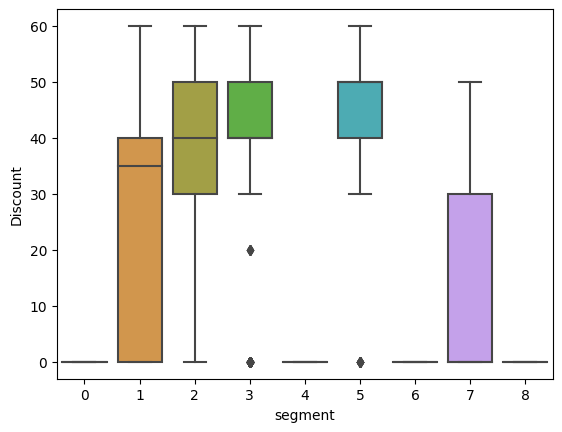

In [55]:
# Persebaran diskon pada tiap cluster
sns.boxplot(x=results["segment"], y=results["Discount"], data=results)

Dari Visualisasi diatas, didapat cluster 0,2,5,6,8 memiliki range diskon antara 0-60. Sedangkan cluster 1,4,8 memiliki range diskon 0. Lalu untuk cluster 3 memiliki range diskon antara 0-50

<Axes: xlabel='segment', ylabel='Listing_Price'>

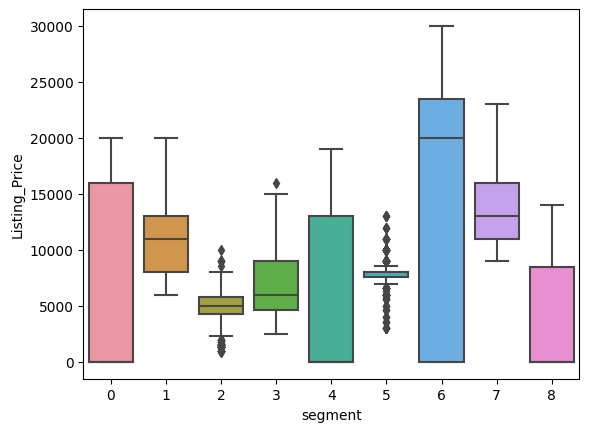

In [56]:
# persebaran listing price pada tiap cluster
sns.boxplot(x=results["segment"], y=results["Listing_Price"], data=results)

Pada visualisasi listing price diatas didaapat,
- cluster 0 memiliki range listing price <=10000
- cluster 1 memiliki range listing price antar > 0 hingga < 20000
- cluster 2 memiliki range listing price <=15000
- cluster 3 memiliki range listing price > 10000 dan < 25000
- cluster 4 memiliki range listing price <=30000
- cluster 5 memiliki range listing price antara >0 hingga < 15000
- cluster 6 memiliki range listing price antara >5000 hingga <=2000
- cluster 7 memiliki range listing price antara >5000 hingga < 2000
- cluster 8 memiliki range listing price antara <=20000